In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('India_humidity.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Relative Humidity
Date,,
2020-03-02,2,59.396946
2020-03-03,1,65.483604
2020-03-04,22,66.755892
2020-03-05,1,68.473099
2020-03-06,2,75.846033


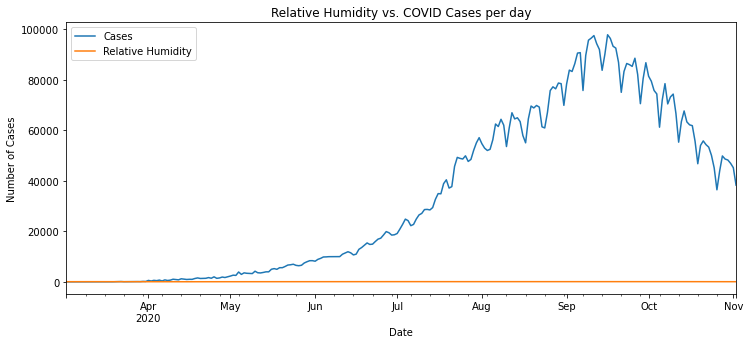

In [2]:
title = 'Relative Humidity vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Relative Humidity'].plot(legend=True);

In [3]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.763322
p-value                   0.398817
# lags used              15.000000
# observations          230.000000
critical value (1%)      -3.459106
critical value (5%)      -2.874190
critical value (10%)     -2.573512
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [5]:
adf_test(df['Relative Humidity'], title='Humidity')

Augmented Dickey-Fuller Test: Humidity
ADF test statistic       -2.293335
p-value                   0.174127
# lags used               0.000000
# observations          245.000000
critical value (1%)      -3.457326
critical value (5%)      -2.873410
critical value (10%)     -2.573096
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [6]:
df_transformed = df.diff()

In [7]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Relative Humidity'], title='HumidityFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -2.124834
p-value                   0.234647
# lags used              16.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: HumidityFirstDiff
ADF test statistic     -1.534277e+01
p-value                 3.811434e-28
# lags used             0.000000e+00
# observations          2.440000e+02
critical value (1%)    -3.457438e+00
critical value (5%)    -2.873459e+00
critical value (10%)   -2.573122e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [8]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Relative Humidity'], title='HumiditySecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic       -4.347048
p-value                   0.000368
# lags used              15.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: HumiditySecondDiff
ADF test statistic     -7.755326e+00
p-value                 9.772394e-12
# lags used             1.500000e+01
# observations          2.280000e+02
critical value (1%)    -3.459361e+00
critical value (5%)    -2.874302e+00
critical value (10%)   -2.573571e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [12]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  20.899457024743164
BIC:  20.928723355048103

Order = 1
AIC:  20.618596510099014
BIC:  20.706660030565768

Order = 2
AIC:  20.134418425639655
BIC:  20.281634830496856

Order = 3
AIC:  20.068994180510423
BIC:  20.275722794249774

Order = 4
AIC:  20.032058388415912
BIC:  20.29866221744674

Order = 5
AIC:  19.87595140519937
BIC:  20.20279719044359

Order = 6
AIC:  18.769372920894234
BIC:  19.156831191342572

Order = 7
AIC:  18.64987284298656
BIC:  19.098317970237414

Order = 8
AIC:  18.580438494690053
BIC:  19.090248748492865

Order = 9
AIC:  18.60985086105793
BIC:  19.18140846588367

Order = 10
AIC:  18.617147084484003
BIC:  19.25083827714576

Order = 11
AIC:  18.640735602796934
BIC:  19.33695069114439

Order = 12
AIC:  18.5971633926333
BIC:  19.356296815345395

Order = 13
AIC:  18.596653841652333
BIC:  19.419104229153103

Order = 14
AIC:  18.595921881521587
BIC:  19.482092118044847

Order = 15
AIC:  18.615318453145168
BIC:  19.565615739974362

Order = 16
AIC:  18.59821455

In [13]:
results = model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 10, Nov, 2020
Time:                     07:55:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    19.0902
Nobs:                     229.000    HQIC:                   18.7861
Log likelihood:          -2743.33    FPE:                1.17387e+08
AIC:                      18.5804    Det(Omega_mle):     1.01723e+08
--------------------------------------------------------------------
Results for equation Cases
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                      -70.870270       137.899846           -0.514           0.607
L1.Cases                    -1.254226         0.067453          -18.594           0.000
L1.Relative Humidity         5.2

In [14]:
lag_order = results.k_ar
lag_order

8

In [15]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[ 1.44486405e+04, -1.78894388e+00],
       [-3.24943461e+03,  2.97694917e+00],
       [-4.68022769e+03, -1.33479470e+00],
       [ 1.01293924e+03, -1.45310525e+00],
       [-1.90199184e+03,  7.27715967e-01],
       [-2.26580108e+03, -1.67419083e-02],
       [-1.63905717e+03, -3.61047101e-02]])

In [16]:
test

,Cases,Relative Humidity
Date,,
2020-10-27,16101.0,4.761624
2020-10-28,-1435.0,-5.455915
2020-10-29,-7221.0,0.098324
2020-10-30,853.0,-1.162606
2020-10-31,-925.0,0.931629
2020-11-01,-427.0,6.775349
2020-11-02,-5189.0,-8.468237


In [17]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Humidity2d'])
df_forecast

,Cases2d,Humidity2d
2020-10-27,14448.640475,-1.788944
2020-10-28,-3249.434611,2.976949
2020-10-29,-4680.227692,-1.334795
2020-10-30,1012.939243,-1.453105
2020-10-31,-1901.991845,0.727716
2020-11-01,-2265.801080,-0.016742
2020-11-02,-1639.057172,-0.036105


In [18]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [19]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Humidity1d'] = (df['Relative Humidity'].iloc[-nobs-1]-df['Relative Humidity'].iloc[-nobs-2]) + df_forecast['Humidity2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['HumidityForecast'] = df['Relative Humidity'].iloc[-nobs-1] + df_forecast['Humidity1d'].cumsum()

In [20]:
df_forecast

,Cases2d,Humidity2d,Cases1d,CasesForecast,Humidity1d,HumidityForecast
2020-10-27,14448.640475,-1.788944,5770.640475,42240.640475,-2.857422,55.768669
2020-10-28,-3249.434611,2.976949,2521.205863,44761.846338,0.119527,55.888196
2020-10-29,-4680.227692,-1.334795,-2159.021829,42602.824509,-1.215267,54.672929
2020-10-30,1012.939243,-1.453105,-1146.082585,41456.741924,-2.668373,52.004556
2020-10-31,-1901.991845,0.727716,-3048.074430,38408.667493,-1.940657,50.063900
2020-11-01,-2265.801080,-0.016742,-5313.875510,33094.791983,-1.957399,48.106501
2020-11-02,-1639.057172,-0.036105,-6952.932682,26141.859300,-1.993503,46.112998


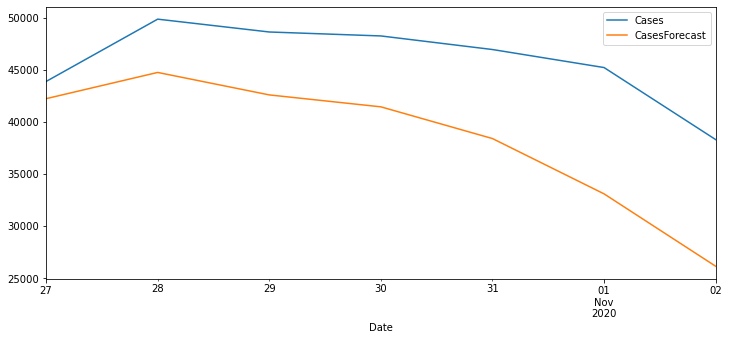

In [21]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);